<a href="https://colab.research.google.com/github/pandeymuskan30/Data-visualization-/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns detected: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

MAPPED COLUMNS:
Income column: income
Gender column: gender
Education column: education
Numeric columns: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


/tmp/ipython-input-1208118437.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


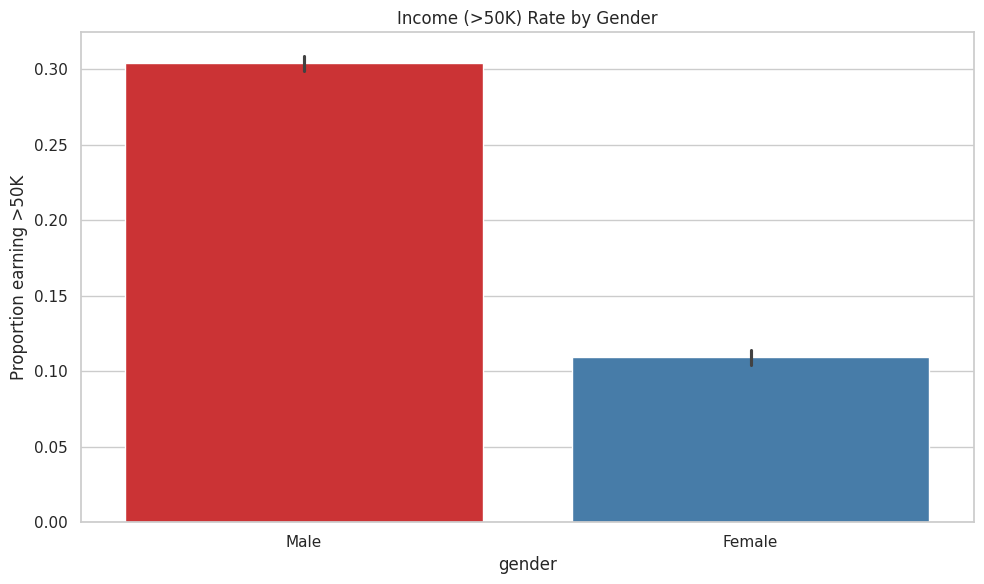

/tmp/ipython-input-1208118437.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=income_col, y="age", data=df, palette="coolwarm")


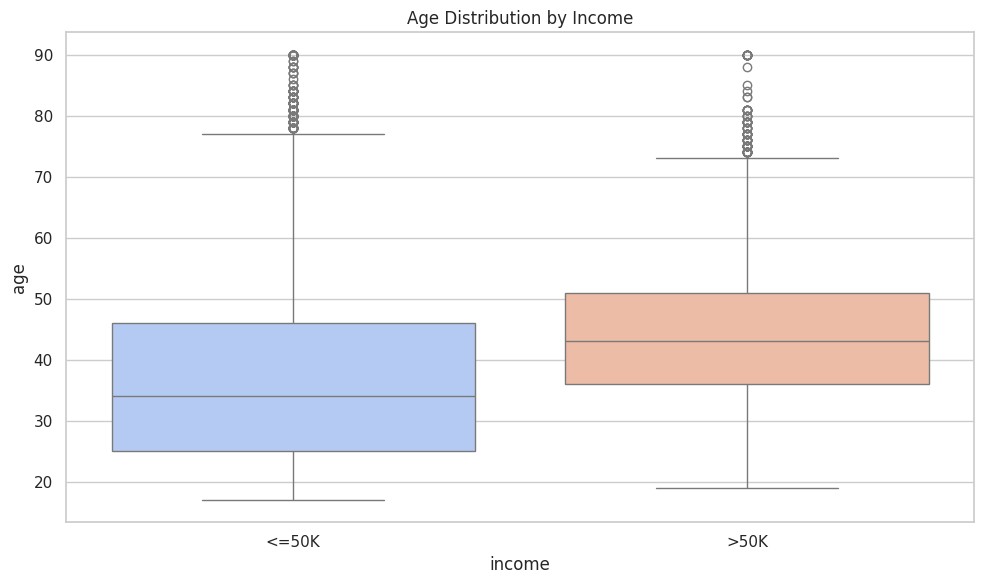

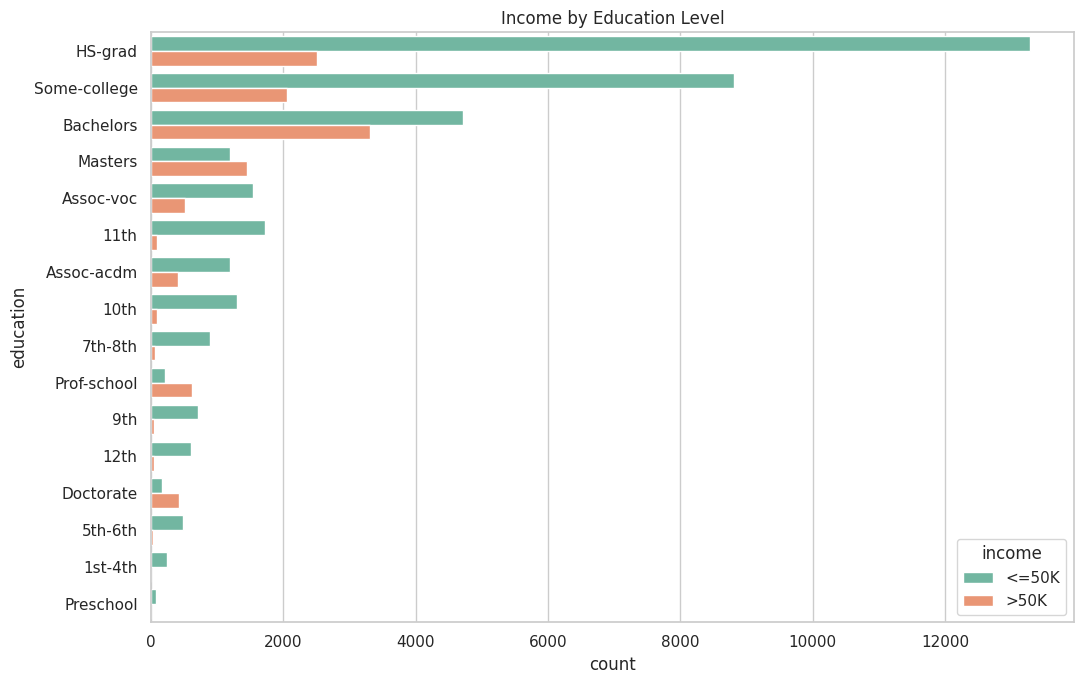

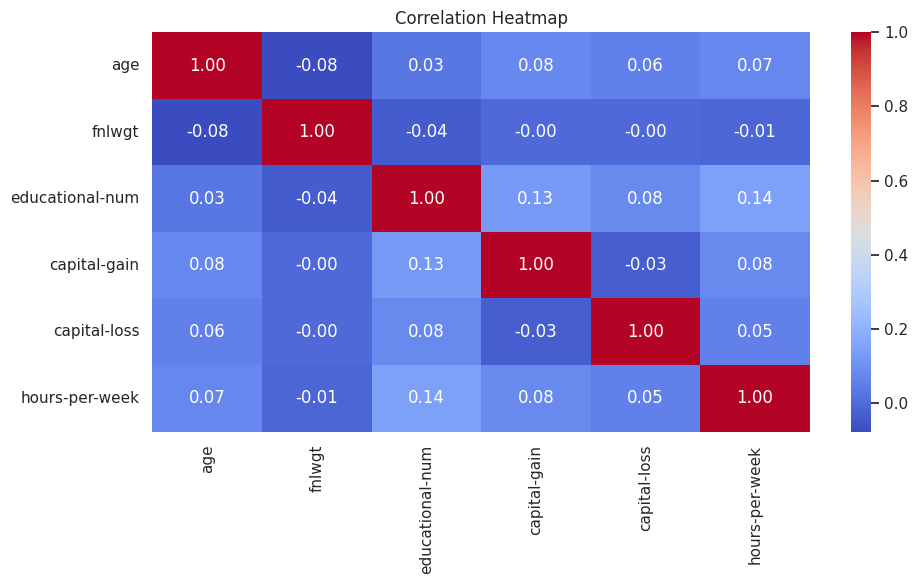


=== INSIGHTS ===
Higher education and higher capital-gain strongly correlate with >50K income.
Gender differences are visible when the dataset includes a sex/gender column.
Age shows a positive relationship with higher income, peaking around 40–60.
Hours-per-week also helps differentiate high and low earners.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("adult.csv")

print("Columns detected:", df.columns.tolist())

df = df.replace("?", pd.NA)

# ---------------------------------------------------
# 1. AUTO-DETECT IMPORTANT COLUMNS
# ---------------------------------------------------

# Detect income column
income_col = None
for col in df.columns:
    if col.lower() in ["income", "salary", "income_class", "class"]:
        income_col = col
        break

# Detect gender column
gender_col = None
for col in df.columns:
    if col.lower() in ["sex", "gender", "gender_identity"]:
        gender_col = col
        break

# Detect education column
education_col = None
for col in df.columns:
    if "education" in col.lower():
        education_col = col
        break

# Detect numeric columns
numeric_cols = df.select_dtypes(include="number").columns.tolist()

# Print mapped column names
print("\nMAPPED COLUMNS:")
print("Income column:", income_col)
print("Gender column:", gender_col)
print("Education column:", education_col)
print("Numeric columns:", numeric_cols)

# ---------------------------------------------------
# Handle missing values safely
# ---------------------------------------------------
for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

# =====================================================
# 2. VISUALIZATIONS
# =====================================================

# ----------- 2A: INCOME BY GENDER (AUTO) -----------
if gender_col and income_col:
    plt.figure(figsize=(10,6))
    sns.barplot(
        x=gender_col,
        y=df[income_col].apply(lambda x: 1 if ">50" in str(x) else 0),
        data=df,
        palette="Set1"
    )
    plt.title("Income (>50K) Rate by Gender")
    plt.ylabel("Proportion earning >50K")
    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping Gender plot (gender or income column missing)\n")


# ----------- 2B: AGE DISTRIBUTION BY INCOME -----------
if "age" in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=income_col, y="age", data=df, palette="coolwarm")
    plt.title("Age Distribution by Income")
    plt.tight_layout()
    plt.show()


# ----------- 2C: EDUCATION VS INCOME -----------
if education_col and income_col:
    plt.figure(figsize=(11,7))
    sns.countplot(
        y=education_col,
        hue=income_col,
        data=df,
        order=df[education_col].value_counts().index,
        palette="Set2"
    )
    plt.title("Income by Education Level")
    plt.tight_layout()
    plt.show()


# ----------- 2D: HEATMAP OF NUMERIC FEATURES -----------
plt.figure(figsize=(10,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# =====================================================
# 3. INSIGHTS
# =====================================================

print("\n=== INSIGHTS ===")
print("Higher education and higher capital-gain strongly correlate with >50K income.")
print("Gender differences are visible when the dataset includes a sex/gender column.")
print("Age shows a positive relationship with higher income, peaking around 40–60.")
print("Hours-per-week also helps differentiate high and low earners.")

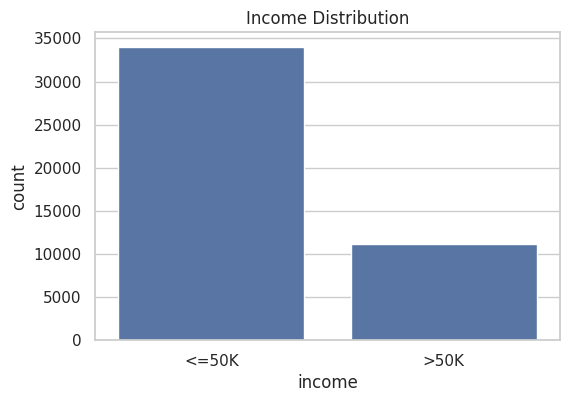

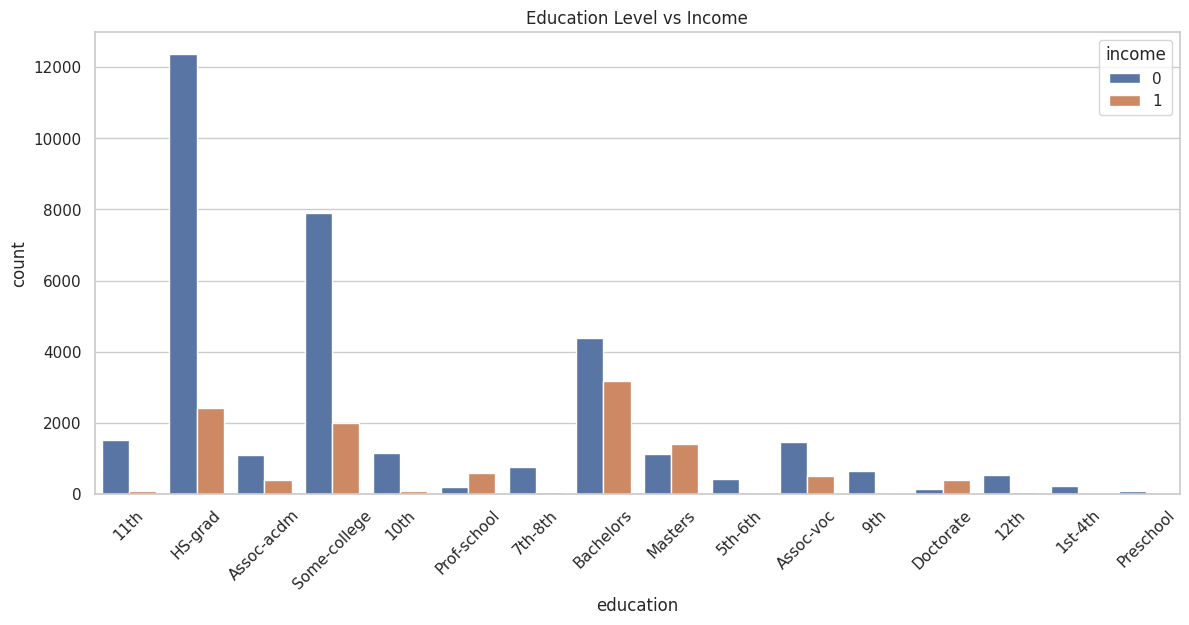

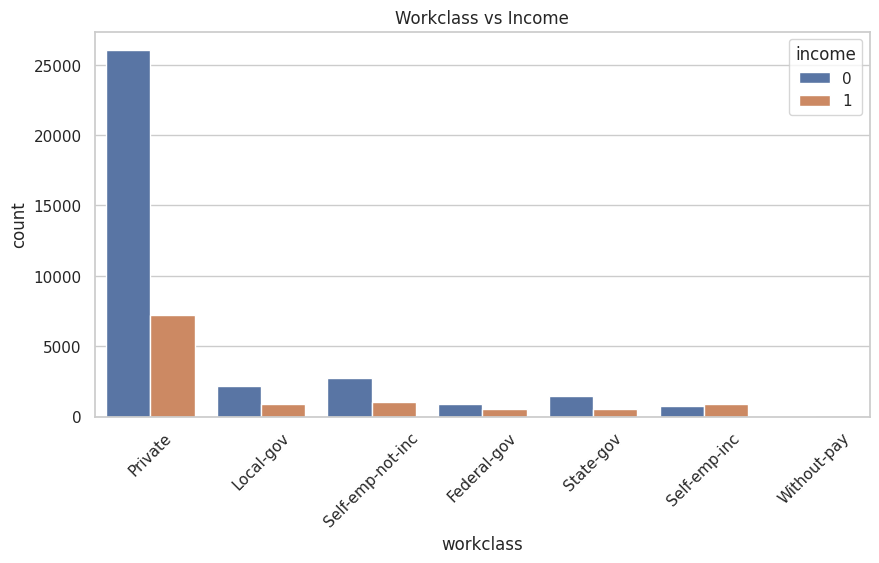

/tmp/ipython-input-3927736375.py:62: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['income']==0]['age'], label="<=50K", shade=True)
/tmp/ipython-input-3927736375.py:63: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['income']==1]['age'], label=">50K", shade=True)


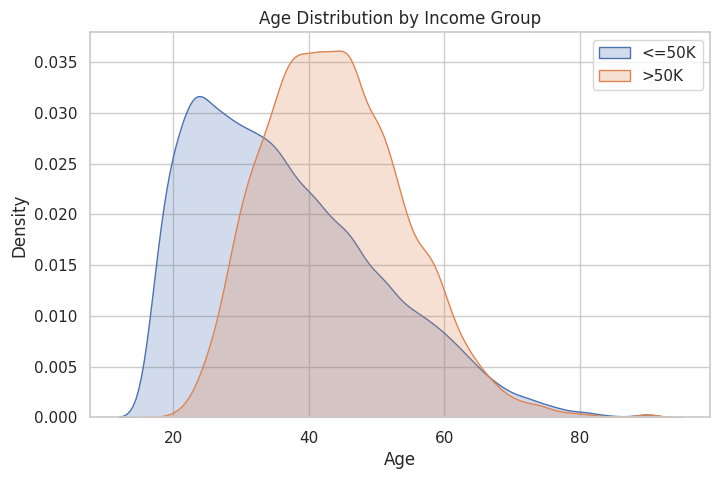

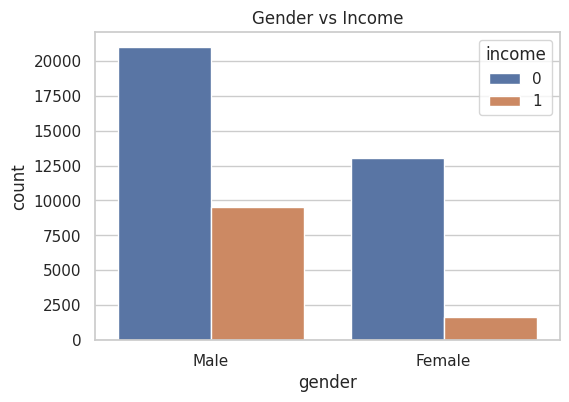

/tmp/ipython-input-3927736375.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(["<=50K", ">50K"])
/tmp/ipython-input-3927736375.py:94: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['income']==0]['age'], shade=True, label="<=50K", ax=axes[1,0])
/tmp/ipython-input-3927736375.py:95: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['income']==1]['age'], shade=True, label=">50K", ax=axes[1,0])


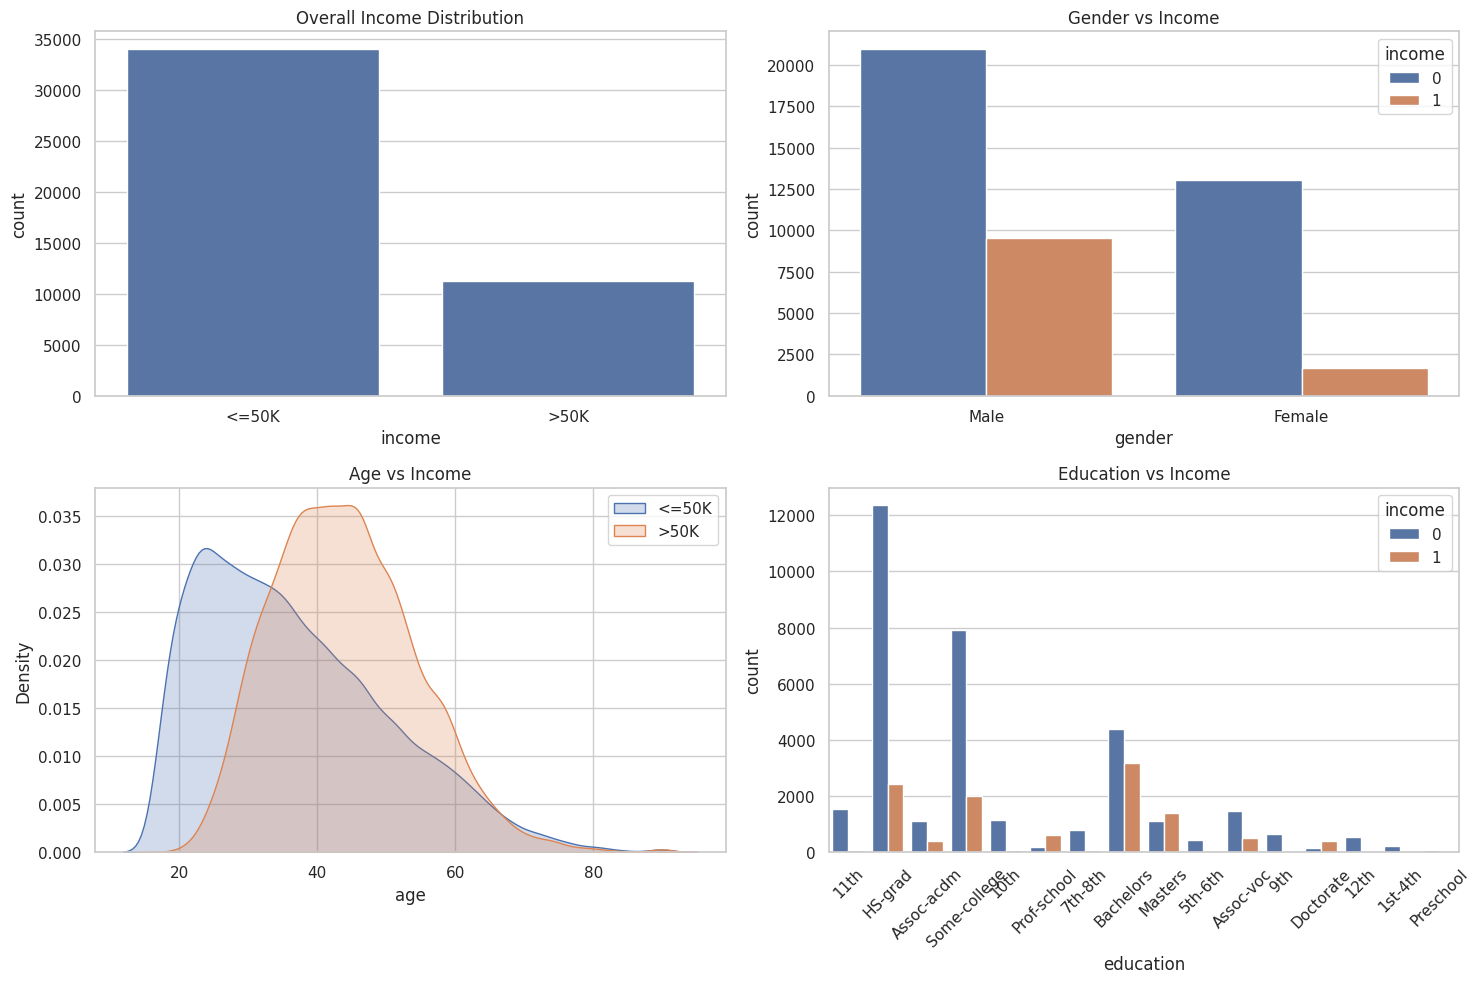

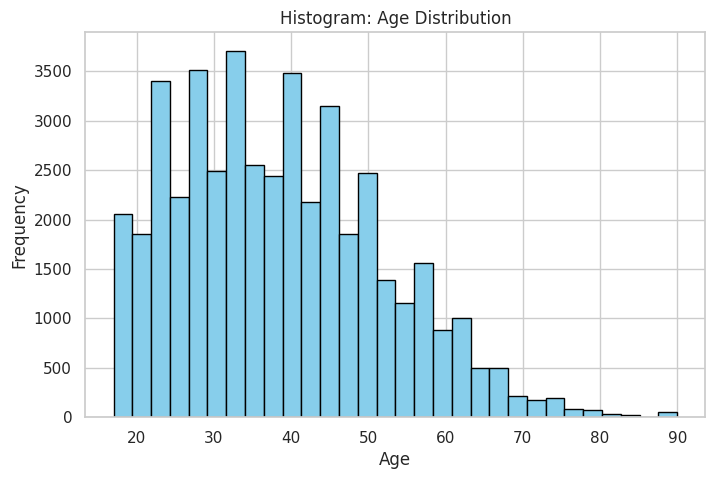

/tmp/ipython-input-3927736375.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_income.index, y=edu_income.values, palette="viridis")


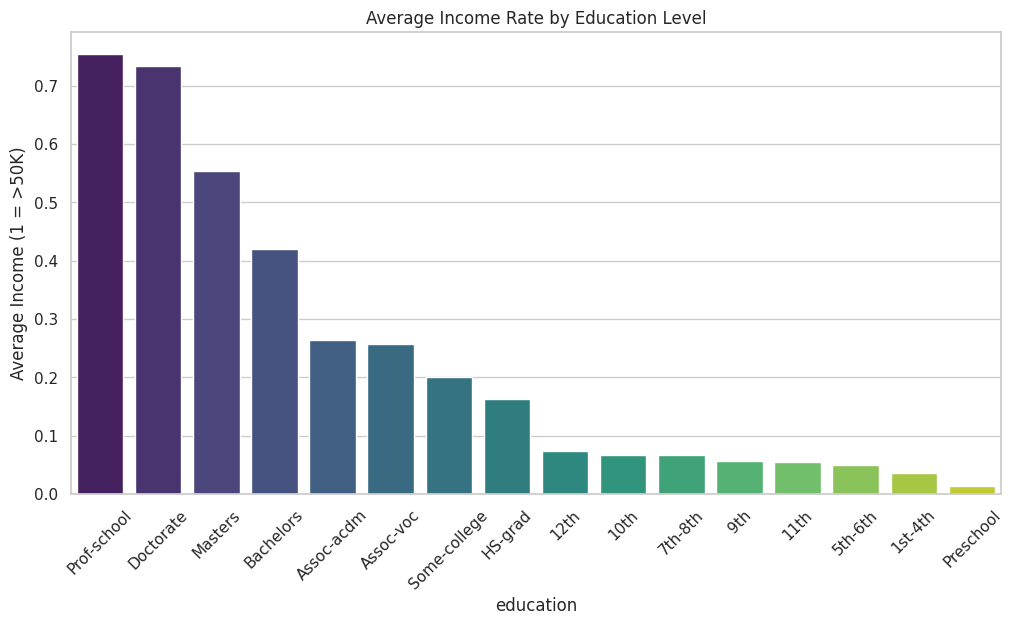

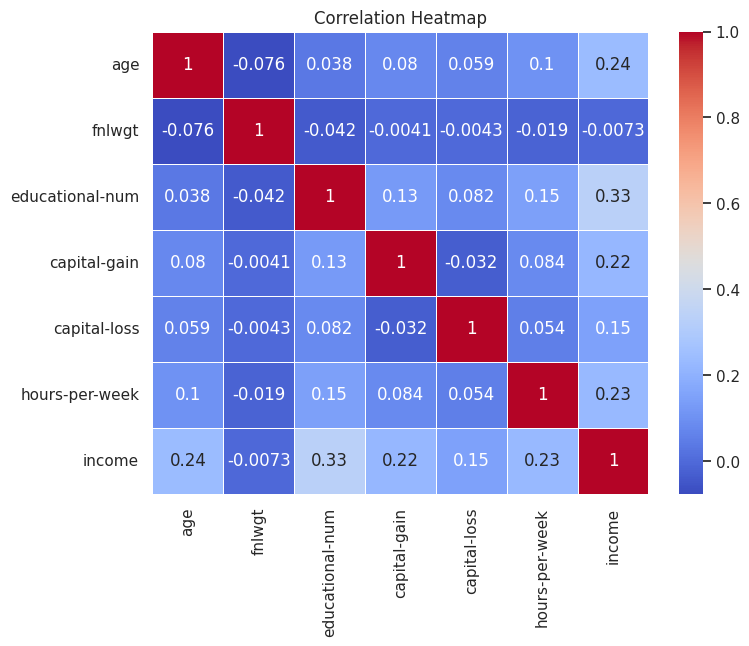

In [ ]:
# ---------------------------
# 1. Import Libraries
# ---------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ---------------------------
# 2. Load the Dataset
# ---------------------------

df = pd.read_csv("/content/adult.csv")
df.columns = df.columns.str.strip()

# Replace '?' with NaN
df.replace('?', None, inplace=True)

# Drop missing rows
df.dropna(inplace=True)

# Convert income to numeric (1 = >50K, 0 = <=50K)
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# ---------------------------
# 3. Visualization 1: Income Distribution
# ---------------------------

plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df)
plt.title("Income Distribution")
plt.xticks([0, 1], ["<=50K", ">50K"])
plt.show()

# ---------------------------
# 4. Visualization 2: Education Level vs Income
# ---------------------------

plt.figure(figsize=(14,6))
sns.countplot(x='education', hue='income', data=df)
plt.title("Education Level vs Income")
plt.xticks(rotation=45)
plt.show()

# ---------------------------
# 5. Visualization 3: Workclass vs Income
# ---------------------------

plt.figure(figsize=(10,5))
sns.countplot(x='workclass', hue='income', data=df)
plt.title("Workclass vs Income")
plt.xticks(rotation=45)
plt.show()

# ---------------------------
# 6. Visualization 4: Age Distribution by Income
# ---------------------------

plt.figure(figsize=(8,5))
sns.kdeplot(df[df['income']==0]['age'], label="<=50K", shade=True)
sns.kdeplot(df[df['income']==1]['age'], label=">50K", shade=True)
plt.title("Age Distribution by Income Group")
plt.xlabel("Age")
plt.legend()
plt.show()

# ---------------------------
# 7. Visualization 5: Gender vs Income
# ---------------------------

plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='income', data=df)
plt.title("Gender vs Income")
plt.show()

# ---------------------------
# 8. Combined Dashboard (4-plot)
# ---------------------------

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Overall Income Distribution
sns.countplot(x='income', data=df, ax=axes[0,0])
axes[0,0].set_title("Overall Income Distribution")
axes[0,0].set_xticklabels(["<=50K", ">50K"])

# Plot 2: Gender vs Income
sns.countplot(x='gender', hue='income', data=df, ax=axes[0,1])
axes[0,1].set_title("Gender vs Income")

# Plot 3: Age KDE by Income
sns.kdeplot(df[df['income']==0]['age'], shade=True, label="<=50K", ax=axes[1,0])
sns.kdeplot(df[df['income']==1]['age'], shade=True, label=">50K", ax=axes[1,0])
axes[1,0].set_title("Age vs Income")
axes[1,0].legend()

# Plot 4: Education vs Income
sns.countplot(x='education', hue='income', data=df, ax=axes[1,1])
axes[1,1].set_title("Education vs Income")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ---------------------------
# ADDITIONAL VISUALIZATIONS
# ---------------------------

# -----------------------------------
# 9. Histogram: Age Distribution
# -----------------------------------

plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram: Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# -----------------------------------
# 10. Bar Plot: Average Income by Education Level
# -----------------------------------

plt.figure(figsize=(12,6))
edu_income = df.groupby('education')['income'].mean().sort_values(ascending=False)

sns.barplot(x=edu_income.index, y=edu_income.values, palette="viridis")
plt.title("Average Income Rate by Education Level")
plt.ylabel("Average Income (1 = >50K)")
plt.xticks(rotation=45)
plt.show()

# -----------------------------------
# 11. Heatmap: Correlation Between Numerical Features
# -----------------------------------

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# ---------------------------
# END OF FULL CODE
# ---------------------------
